# Setup

In [2]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 9.4MB/s 
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [3]:
!pip3 install quandl

  Using cached Quandl-3.5.0-py2.py3-none-any.whl (25 kB)
  Using cached inflection-0.4.0-py2.py3-none-any.whl (5.8 kB)


In [155]:
!python -m pip install statsmodels 

Password:


In [744]:
import quandl
import pandas as pd
import stocker
quandl.ApiConfig.api_key = '1MN4xbFX3wwQNXvao-9-'
# quandl.ApiConfig.api_version = '2015-04-09'

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates
import seaborn as sns
%matplotlib inline



plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['text.color'] = 'k'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas_datareader import data
import datetime as dt


import warnings
import itertools
import numpy as np
import statsmodels.api as sm



In [2]:
# quandl.bulkdownload("GILD")
from pytrends.request import TrendReq

In [5]:
# data = quandl.get("WIKI/GILD", returns="numpy")

In [6]:
# data.shape

(6594,)

In [16]:
# df = pd.DataFrame(data)
# df.head

In [17]:
# quandl.bulkdownload("NSE")

In [3]:
# start is calculated as 365 days X years
years = 12
end = dt.datetime.today().strftime('%Y-%m-%d')  # today as the end date
start = (dt.datetime.today() - dt.timedelta(days=365*years)).strftime('%Y-%m-%d')  
GILD = data.DataReader('GILD', 'yahoo', start, end)
SGEN = data.DataReader('SGEN', 'yahoo', )

In [157]:
# nested column set in df
df = data.DataReader(('GILD', 'SGEN'), 'yahoo', start, end)

In [160]:
# df.head()
df['Adj Close', 'GILD']

Date
2008-05-09    23.276936
2008-05-12    23.641451
2008-05-13    23.203165
2008-05-14    22.808268
2008-05-15    22.977510
                ...    
2020-04-30    84.000000
2020-05-01    79.949997
2020-05-04    80.250000
2020-05-05    79.139999
2020-05-06    77.470001
Name: (Adj Close, GILD), Length: 3019, dtype: float64

In [6]:
# GILD = quandl.get('WIKI/GILD')


# SGEN = quandl.get('WIKI/SGEN')

In [7]:
type(GILD)

GILD.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [55]:

# from pandas.io.json import json_normalize
# json_normalize
# !pip install -U pandas

In [56]:
# !pip install --upgrade pip setuptools

# !pip install stocker
# !python3 -m pip install stocker
# from stocker import Stocker

# this is a working source https://github.com/jcamiloangarita/stocker
# import stocker

In [22]:
# amazon = Stocker('AMZN')
stocker.predict.tomorrow('AMZN')

[2330.11, 2.353, '2020-05-06']

In [58]:
# amazon.plot_stock()

In [59]:
# Stocker('GILD')

In [60]:
# import statsmodels.api as sm
# SARIMAXResults.get_prediction()


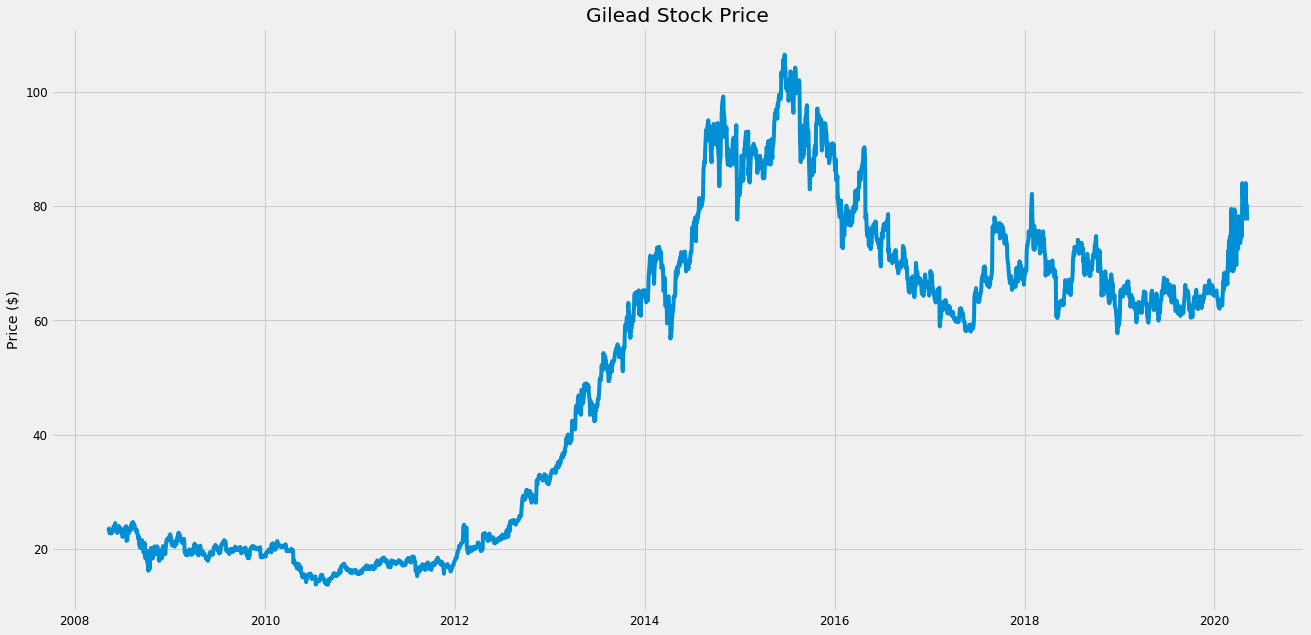

In [11]:
# The adjusted close accounts for stock splits, so that is what we should graph
# plt.plot(GILD.index, GILD['Adj. Close'])
plt.plot(GILD.index, GILD['Adj Close'])
plt.title('Gilead Stock Price')
plt.ylabel('Price ($)')
plt.show()

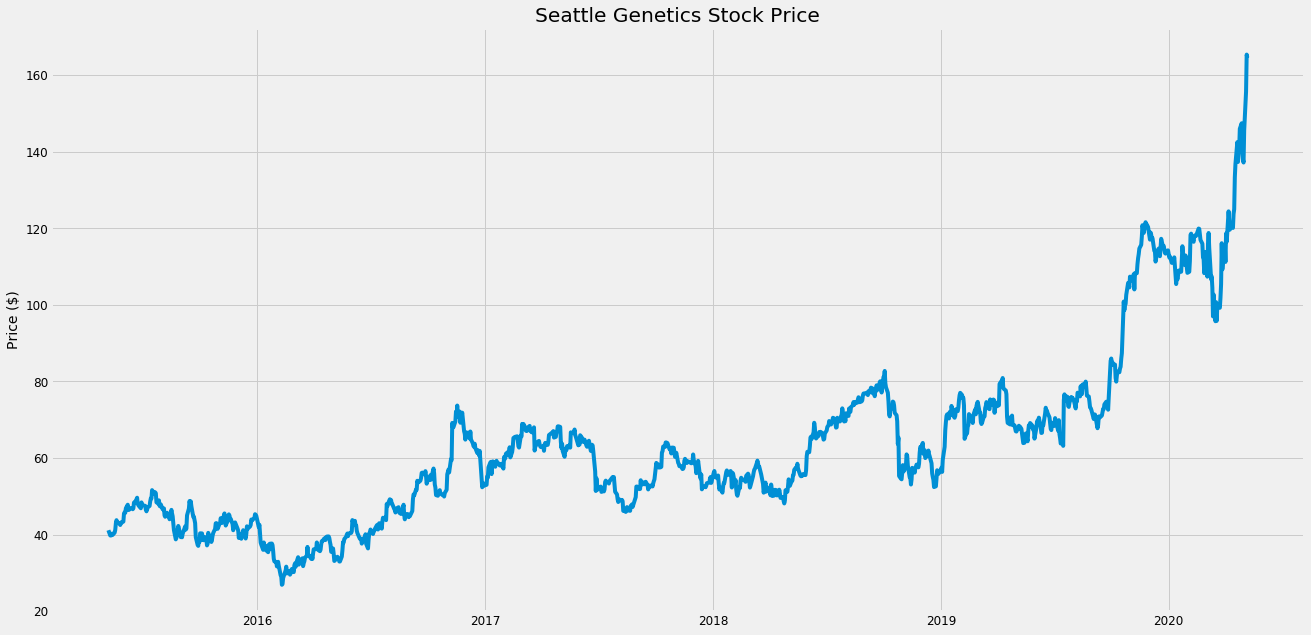

In [12]:
# plt.plot(SGEN.index, SGEN['Adj. Close'])
plt.plot(SGEN.index, SGEN['Adj Close'])
plt.title('Seattle Genetics Stock Price')
plt.ylabel('Price ($)')
plt.show()

In [13]:
# !pip install --upgrade --force-reinstall holidays # version '0.10.2'
GILD.tail()
SGEN.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-30,140.899994,136.699997,138.990005,137.229996,2036700,137.229996
2020-05-01,157.000000,140.050003,141.000000,145.639999,2800000,145.639999
2020-05-04,155.889999,145.009995,145.009995,155.759995,2072200,155.759995
2020-05-05,168.100006,160.500000,163.119995,165.429993,2026800,165.429993
2020-05-06,167.509995,163.080002,166.429993,164.639999,1728300,164.639999


In [14]:
# !python3 -m pip install fbprophet
#from dateutil.easter import easter # fix for ImportError: cannot import name 'easter' from 'holidays' 
#(/Users/dpong/anaconda3/lib/python3.7/site-packages/holidays/__init__.py)
import plotly
import fbprophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
print(fbprophet.__version__)

0.6


In [15]:
import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.write_html('first_figure.html', auto_open=True)

In [16]:
GILD.reset_index(inplace = True)

In [373]:
# Prophet requires columns ds (Date) and y (value)

gild = GILD.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

In [374]:
gild

,ds,High,Low,Open,Close,Volume,y
0,2008-05-09,27.070000,26.625000,26.754999,26.820000,8105200.0,23.276936
1,2008-05-12,27.254999,26.625000,26.705000,27.240000,10956800.0,23.641451
2,2008-05-13,27.250000,26.615000,27.055000,26.735001,12710600.0,23.203165
3,2008-05-14,26.995001,26.200001,26.980000,26.280001,11182400.0,22.808268
4,2008-05-15,26.684999,26.065001,26.200001,26.475000,11145200.0,22.977510
...,...,...,...,...,...,...,...
3014,2020-04-30,85.669998,81.330002,85.470001,84.000000,39332600.0,84.000000
3015,2020-05-01,81.400002,77.620003,81.199997,79.949997,34498100.0,79.949997
3016,2020-05-04,81.760002,79.190002,81.620003,80.250000,19203000.0,80.250000
3017,2020-05-05,79.830002,78.510002,79.330002,79.139999,14925900.0,79.139999


# Effect of Changepoint Prior Scale

changepoint_prior_scale is parameter for the model to indicate how flexible the changepoints are allowed to be. In other words, to what extent can the changepoints fit to the data. I find out that it can't be too extreme. It can't be too small of a scale and too big of a scale. The higher it is, the more flexible the model will be. The drawback is you might end up overfitting.

In [31]:
# Try 3 different changepoints
for changepoint in [.0015, .15, 15]:
        model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
        model.fit(gild)
        
        future = model.make_future_dataframe(periods=365, freq = 'D')
        future = model.predict(future)
        
        gild[changepoint] = future['yhat']

/Users/dpong/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



KeyError: 0.0015

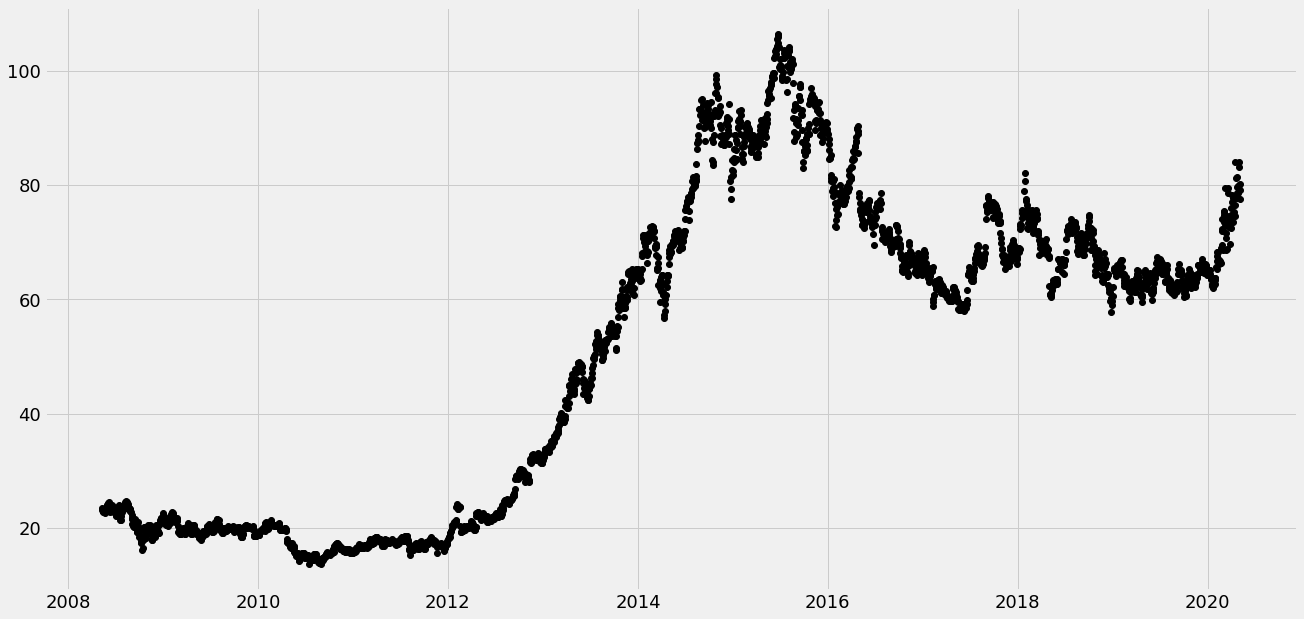

In [752]:
# Create the plot
# plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(gild['ds'], gild['y'], 'ko', label = 'Observations')
colors = {.0015: 'b', .15: 'r', 15: 'grey'}

# Plot each of the changepoint predictions
for changepoint in [.0015, .15, 15]:
    plt.plot(gild['ds'], gild[changepoint], color = colors[changepoint], label = '%.4f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Stock Price'); plt.title('Effect of Changepoint Prior Scale');

# changepoint_prior_scale = 0.15 is what I end up using

In [19]:
# gild_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
gild_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gild_prophet.fit(gild)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/dpong/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [20]:
# Make a future dataframe for 1 year
gild_forecast = gild_prophet.make_future_dataframe(periods=365 , freq='D')

# Make predictions 
gild_forecast = gild_prophet.predict(gild_forecast)

Text(0.5, 1, 'Stock Prices of Gilead (GILD)')

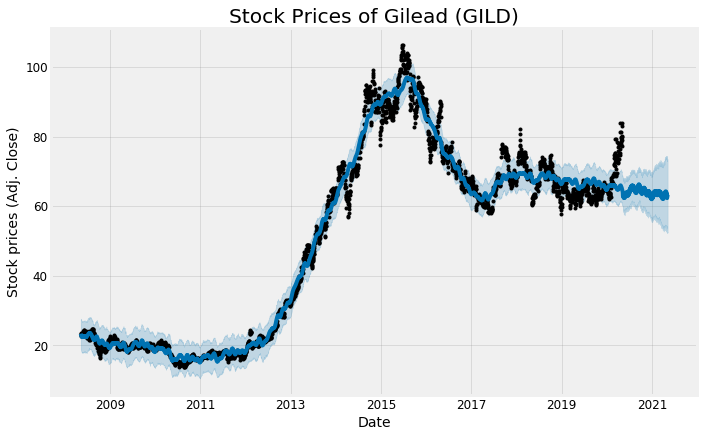

In [21]:
gild_prophet.plot(gild_forecast, xlabel = 'Date', ylabel = 'Stock prices (Adj. Close)')
plt.title('Stock Prices of Gilead (GILD)')

In [36]:
gild_prophet.changepoints[:10]

97    2008-09-25
193   2009-02-12
290   2009-07-02
386   2009-11-17
483   2010-04-09
579   2010-08-25
676   2011-01-12
772   2011-06-01
869   2011-10-18
966   2012-03-08
Name: ds, dtype: datetime64[ns]

In [37]:
gild_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [33]:
# !sudo pip3 install --upgrade pandas==0.25.3
# conda install -c conda-forge fbprophet==0.6

# Diagnostics

In [24]:
df_cv = cross_validation(gild_prophet, initial='730 days', period='180 days', horizon = '100 days')
df_cv.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2010-09-16 00:00:00 and 2020-01-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-17,14.174003,13.369617,15.007604,14.997218,2010-09-16
1,2010-09-20,14.056307,13.312156,14.832649,15.444182,2010-09-16
2,2010-09-21,14.044019,13.272355,14.861697,15.578709,2010-09-16
3,2010-09-22,13.996793,13.205304,14.813956,15.626441,2010-09-16
4,2010-09-23,13.921013,13.132618,14.751691,15.526632,2010-09-16


In [711]:
df_p = performance_metrics(df_cv)


48.96440579600332

# Note that the lowest MAPE for FB prophet is .77

In [713]:
df_p.mape.min()

0.07706783673291007

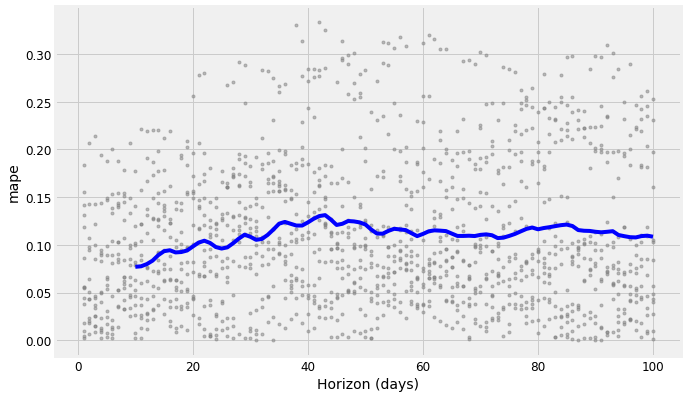

In [26]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Also note that the lowest MSE (Mean Square Error) is ~49

In [712]:
df_p.mse.min()

48.96440579600332

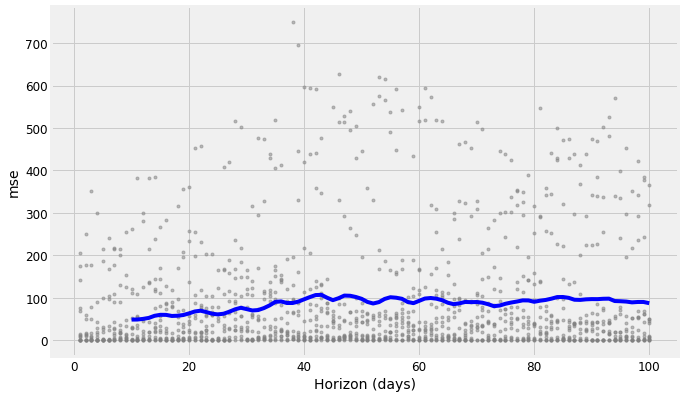

In [87]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

# Trends and Patterns

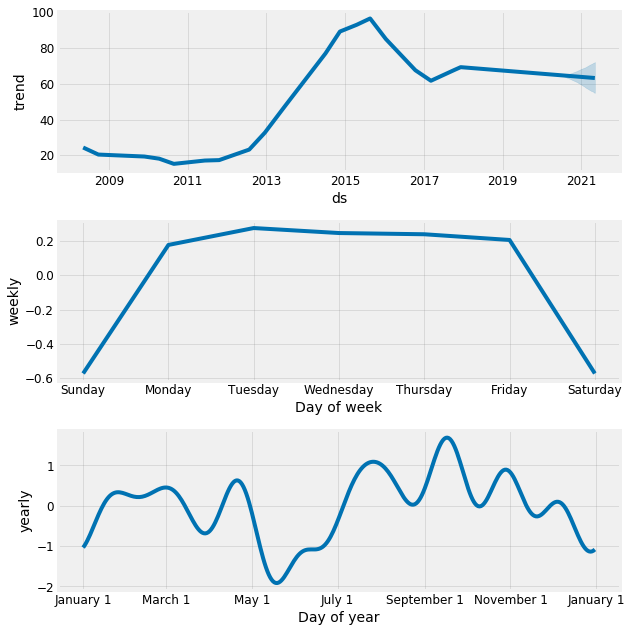

In [38]:
# Plot the trends and patterns
gild_prophet.plot_components(gild_forecast);

In [383]:
# y = gild['y']
# y = y.fillna(y.bfill())

In [400]:
# gild.loc[:, 'ds'] = pd.to_datetime(gild.ds, errors='coerce')

In [384]:
# y['ds'] = pd.to_datetime(y['ds'], errors='coerce')
# y = y.dropna(subset=['ds'])


In [588]:
y = gild.set_index('ds')

In [589]:
# y.index = pd.DatetimeIndex(y.index).to_period('D')

In [590]:
y.index

DatetimeIndex(['2008-05-09', '2008-05-12', '2008-05-13', '2008-05-14',
               '2008-05-15', '2008-05-16', '2008-05-19', '2008-05-20',
               '2008-05-21', '2008-05-22',
               ...
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', name='ds', length=3019, freq=None)

In [592]:
y = y[['y']]

In [593]:
# y = y[:'2020-03-17']
y.tail()

,y
ds,
2020-04-30,84.000000
2020-05-01,79.949997
2020-05-04,80.250000
2020-05-05,79.139999
2020-05-06,77.470001


In [594]:
y.index

DatetimeIndex(['2008-05-09', '2008-05-12', '2008-05-13', '2008-05-14',
               '2008-05-15', '2008-05-16', '2008-05-19', '2008-05-20',
               '2008-05-21', '2008-05-22',
               ...
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', name='ds', length=3019, freq=None)

# Parameter Selection for the AIRMA Time Series Model

In [391]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [595]:
train_data = y[start: '2020-03-17']
test_data = y['2020-03-18': '2020-05-04']

# QA my training and test data sets

In [596]:
train_data.size

2984

In [576]:
# train_data = train_data.dropna()
train_data.index

PeriodIndex(['2008-05-09', '2008-05-12', '2008-05-13', '2008-05-14',
             '2008-05-15', '2008-05-16', '2008-05-19', '2008-05-20',
             '2008-05-21', '2008-05-22',
             ...
             '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
             '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
             '2020-03-16', '2020-03-17'],
            dtype='period[D]', name='ds', length=2984, freq='D')

In [577]:
train_data.tail()

ds
2020-03-11    73.019997
2020-03-12    68.580002
2020-03-13    70.750000
2020-03-16    68.900002
2020-03-17    74.519997
Freq: D, Name: y, dtype: float64

In [603]:
test_data.head()

,y
ds,
2020-03-18,79.419998
2020-03-19,78.550003
2020-03-20,73.260002
2020-03-23,72.610001
2020-03-24,73.959999


In [604]:
test_data.tail()


,y
ds,
2020-04-28,78.669998
2020-04-29,83.139999
2020-04-30,84.000000
2020-05-01,79.949997
2020-05-04,80.250000


In [580]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data, #y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:32616.739702775736
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:28656.692075311556
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15491.9828121492
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:15372.791525863786
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15496.573535973426
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:15422.15330293033
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:15370.175716714544
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:15364.157665222181
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:28543.962005912792
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:24674.785972505706
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:12935.755565711599
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12718.390289126819
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:12944.775343806978
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:15698.741431541488
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:12724.532359320254
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12717.372631419214
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8695.054256776544
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8670.7185841790

In [581]:
# printing the parameter combination that yeilds that lowest AIC 
print('The model SARIMAX{}x{} attains the lowest AIC of {} out of all the models we have considered. '
      .format(SARIMAX_model[AIC.index(min(AIC))][0], 
              SARIMAX_model[AIC.index(min(AIC))][1], 
              min(AIC)
             )
     )

The model SARIMAX(1, 1, 1)x(0, 0, 1, 12) attains the lowest AIC of 8664.517335614411 out of all the models we have considered. 


In [691]:
# Let's fit the model with the lowest AIC

# Let's fit this model
model_sarima = sm.tsa.statespace.SARIMAX(y,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model_sarima.fit()

In [583]:
# pd.plotting.register_matplotlib_converters()

Once the model has been fitted, we can check if the fitted model does what we expect and if the assumptions we made are violated. To do this, we can use the $plot\_diagnostics$ method.


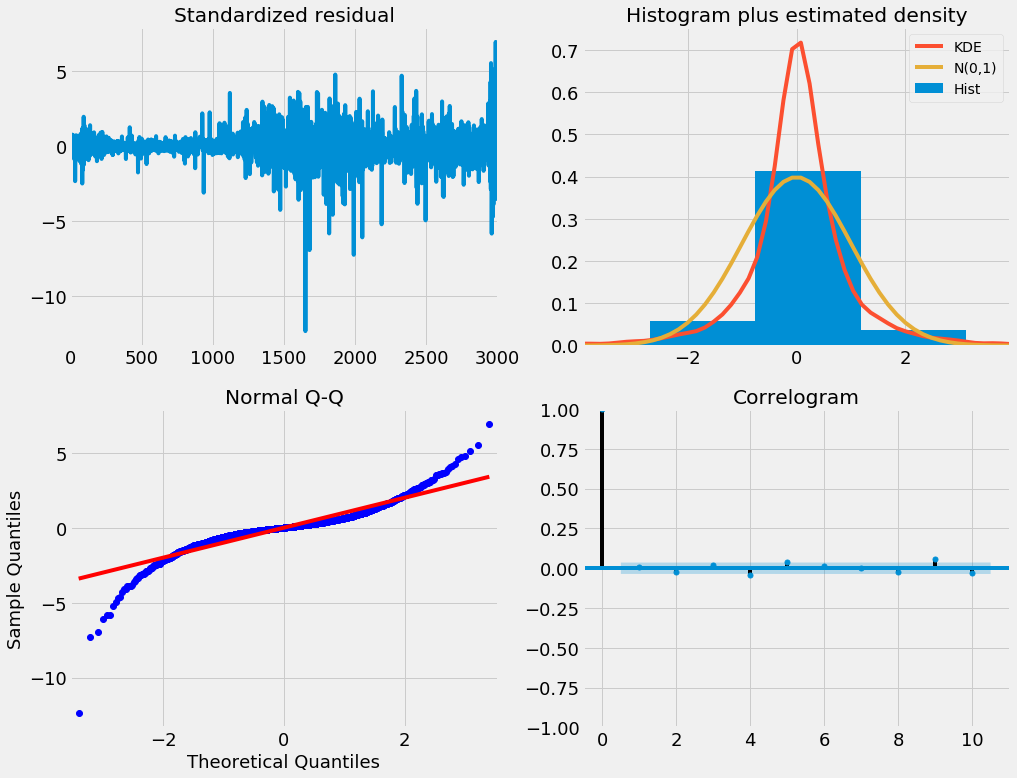

In [745]:
results.plot_diagnostics (figsize=(15, 12));

In the plots above, we can observe that the residuals are uncorrelated (bottom right plot) and do not exhibit any 
obvious seasonality (the top left plot). Also, the histogram (on the top right) shows the residuals are nearly normally 
distributed with zero mean. The normality of the residuals are exhibited in the bottom left plot, the Normal Q-Q plot. 
Although we do see there are some violations in the standardized residual plot, I think I can give it a pass in terms of 
linearity of the residuals.


# Validating Forecasts

In [141]:
start

'2008-05-09'

In [123]:
y.head()
y.tail()

ds
2020-04-30    84.000000
2020-05-01    79.949997
2020-05-04    80.250000
2020-05-05    79.139999
2020-05-06    77.470001
Name: y, dtype: float64

In [546]:
train_data.tail()

,y
ds,
2020-03-11,73.019997
2020-03-12,68.580002
2020-03-13,70.750000
2020-03-16,68.900002
2020-03-17,74.519997


In [667]:
# The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.


pred0 = results.get_prediction(start=pd.to_datetime('2020-03-18'), dynamic=False)
pred0_ci = pred0.conf_int()

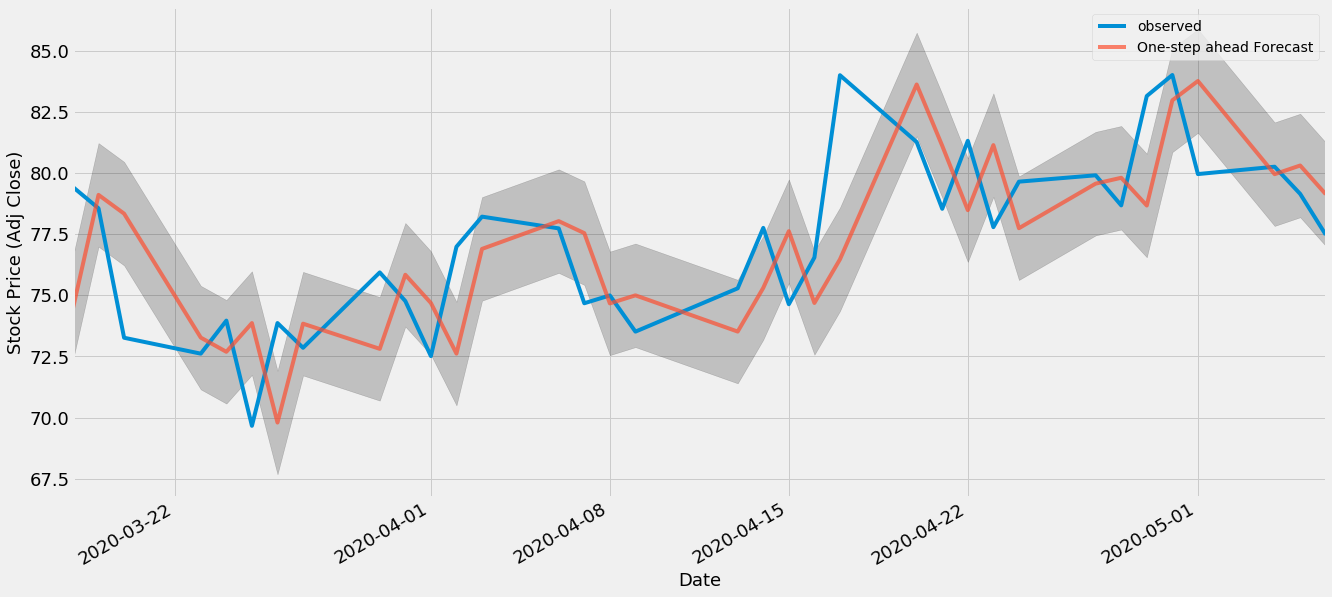

In [746]:
ax = y['2020-03-18':].plot(label='observed')
pred0.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred0_ci.index,
                pred0_ci.iloc[:, 0],
                pred0_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price (Adj Close)')
plt.legend(prop={'size': 14})

plt.show()

In [683]:
# y_truth

# y = y['y']

In [682]:
# y

In [681]:
# y_forecasted.index
# type(y_forecasted)
# y_forecasted

In [ ]:
# turn y back to a series instead of a dataframe
y = y['y']

In [715]:
y_forecasted = pred0.predicted_mean
y_truth = y['2020-03-18':]


# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 8.26


In [716]:
mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))

print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

The Mean Absolute Percentage Error of our forecasts is 0.03


In [687]:
# changing gear to use dynamic forecasts and conf intervals from the start date onwards. 
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-03-18'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [688]:
# %debug 

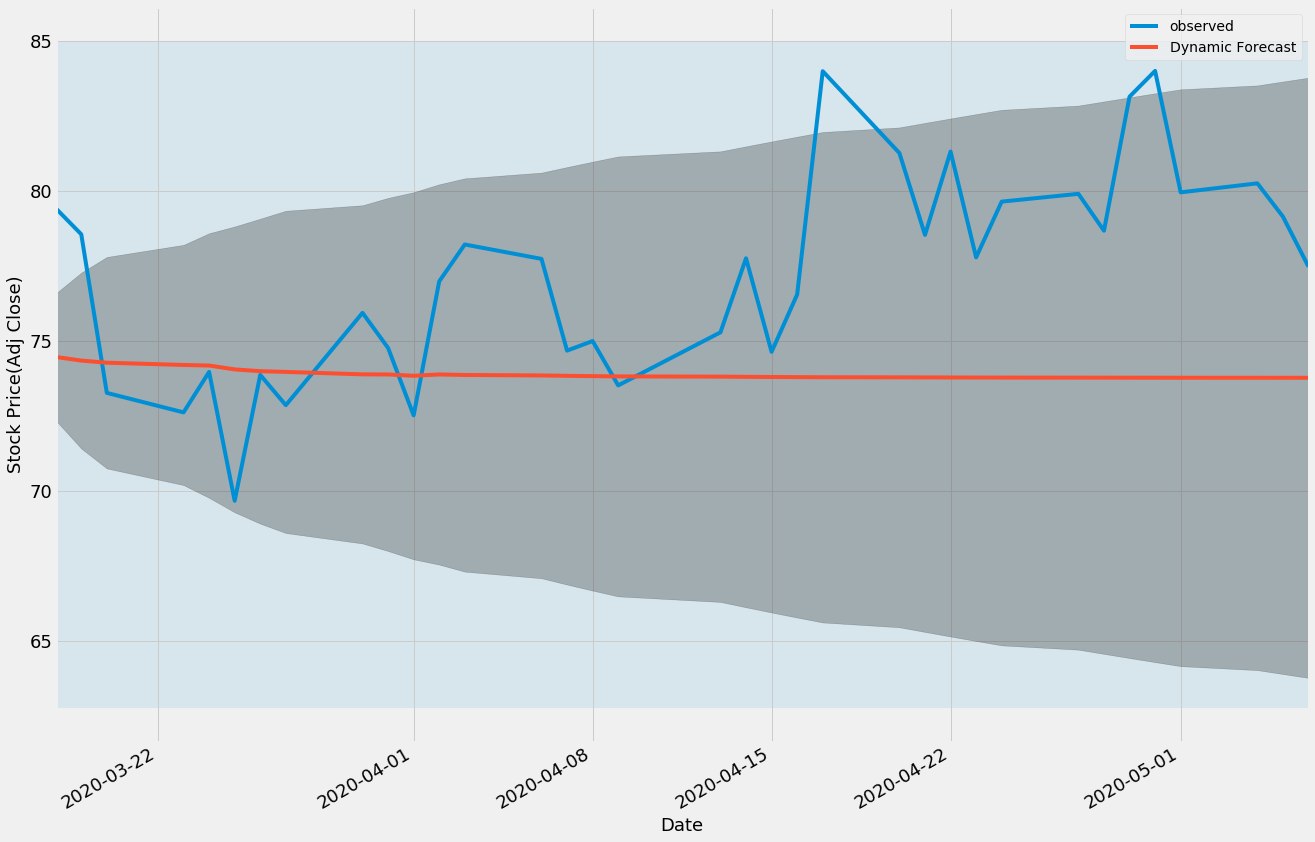

In [747]:
ax = y['2020-03-18':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-03-18'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price(Adj Close)')

plt.legend(prop={'size': 14})
plt.show()

In [693]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2020-03-18':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 23.21


In [714]:
mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))

print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

The Mean Absolute Percentage Error of our forecasts is 0.05


# Establish a model prediction using out of sample data.

In [473]:
# def expand_dates(ser):
#     return pd.DataFrame({'date': pd.date_range(ser['date'].min(), ser['date'].min() + 365, freq='D')})

In [696]:
# expand_dates(pd)

In [524]:
# type(results)
# type(pred2)

In [523]:
# sarima_preds_df = pd.DataFrame(pred2.predicted_mean.values)

In [717]:
# fcast_index = pd.to_datetime(['2020-04-02 9:00am', '2017-04-02 9:00am', ...])

pred2 = results.get_forecast(steps = 365,index = pd.DatetimeIndex(pd.date_range(start='2020-05-05', periods=365)))

# pred2 = results.get_forecast(start=pd.to_datetime('2020-03-18'), end=pd.to_datetime('2020-05-04'),dynamic=False)
pred2_ci = pred2.conf_int()

# print(pred2.predicted_mean.apply(np.exp))

# print (pred2_ci)

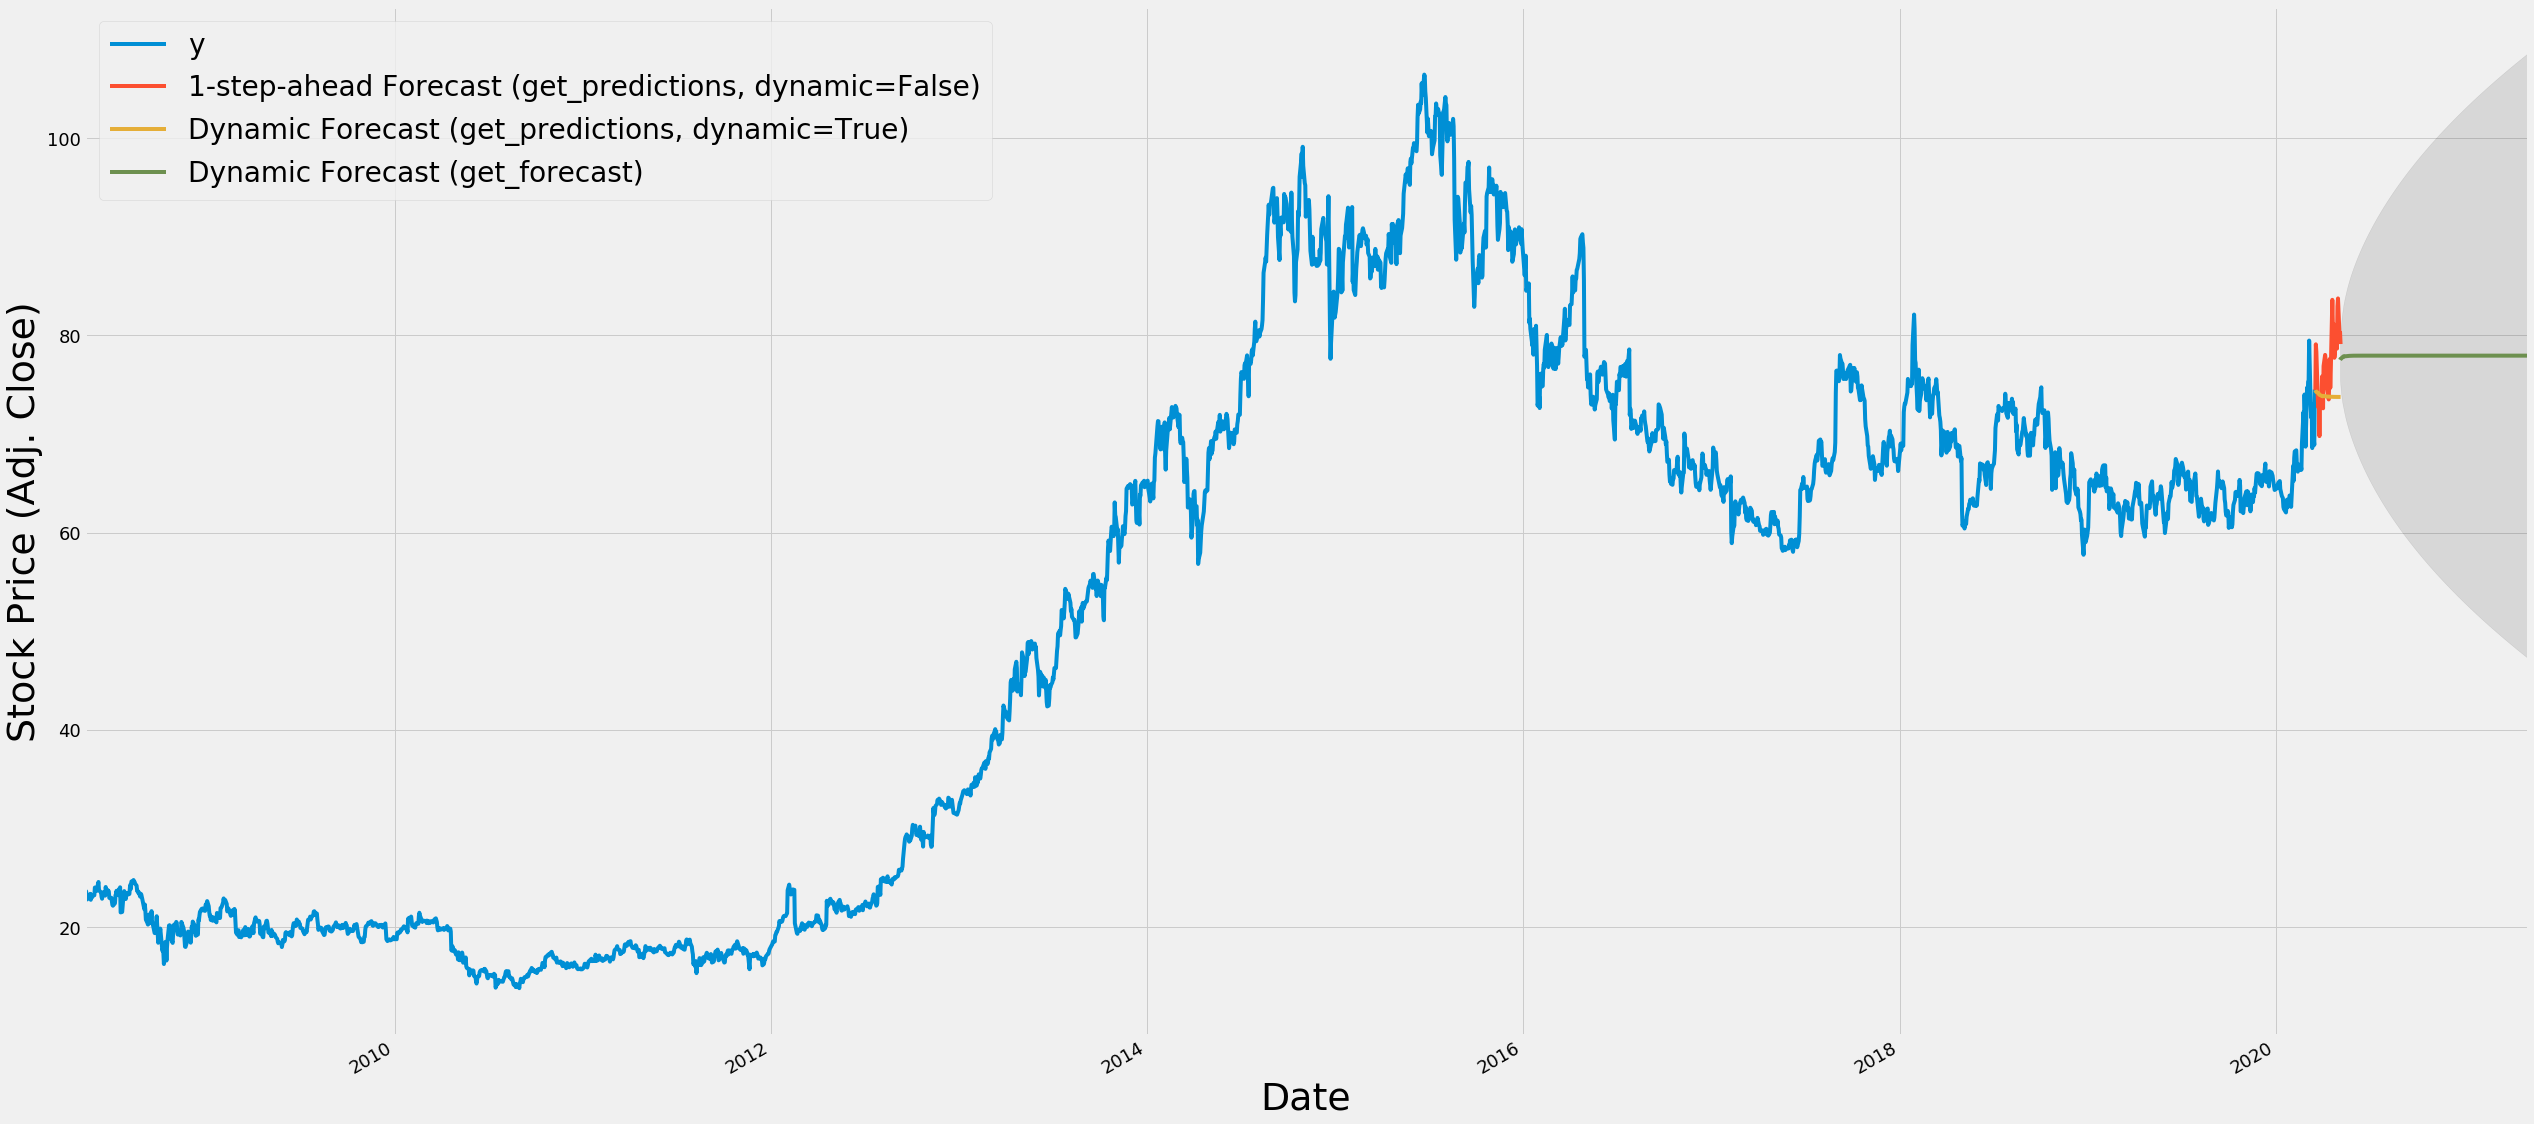

In [751]:
# days = dt.datetime.strptime(str(pred2_ci.index),  "%m/%d/%Y")
# plt.plot_date(x=days, y=value, fmt="r-")

ax = train_data.plot(label='observed', figsize=(39, 21))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Stock Price (Adj. Close)', fontsize=38)
plt.xlabel('Date', fontsize=38)
plt.legend(loc=2, prop={'size': 28})

plt.show()

# Producing and Visualizing Forecasts

In [138]:
# Get forecast 365 steps ahead in future (~ 1 year)
# pred_uc = results.get_forecast(steps=365)

# Get confidence intervals of forecasts
# pred_ci = pred_uc.conf_int()

In [521]:
# time_formatter = matplotlib.dates.DateFormatter("%Y-%m-%d")

# plt.axes().xaxis_date()
# ax = plt.axes().xaxis.set_major_formatter(time_formatter)
# ax.xaxis_date()

In [522]:
# ax = y.plot(label='observed', figsize=(20, 15))
# # pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# pred2.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Stock Price (Adj Close)')

# plt.legend()
# plt.show()

In [218]:
# pred_uc.predicted_mean.plot(ax = ax)

In [707]:
# y